In [1]:
%load_ext autoreload
%autoreload 2

here the objective is to fit the logit graph model to multiple different graph domains and then visualize the original vs fitted graphs

In [3]:

import sys
import os
sys.path.append('../..')

#Graph imports
import src.graph as graph
import src.logit_estimator as estimator
import src.utils as utils
import src.model_selection as model_selection
import src.gic as gic
import src.param_estimator as pe
import src.graph as graph
import src.model_selection as ms

# usual imports
import matplotlib.pyplot as plt
import pickle
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx
from numpy import errstate

from IPython.display import display
from pyvis.network import Network
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [4]:
FOLDER_OUTPUT = f'runs/fitted_graphs_comparison_facebook5'
out_files = os.listdir(FOLDER_OUTPUT)
out_files = sorted(out_files, key=lambda x: os.path.getctime(os.path.join(FOLDER_OUTPUT, x)), reverse=True)

out_files

['comparators_107.pkl',
 'comparators_1684.pkl',
 'comparators_1912.pkl',
 'comparators_3437.pkl',
 'comparators_0.pkl',
 'comparators_348.pkl',
 'comparators_686.pkl',
 'comparators_414.pkl',
 'comparators_698.pkl',
 'comparators_3980.pkl']

In [5]:
import pickle
#pick first id from out_files
id = out_files[0].split('_')[1]

with open(f'{FOLDER_OUTPUT}/comparators_{id}', 'rb') as f:
    comparators = pickle.load(f)


In [6]:
import pickle
# with open(f'{FOLDER_OUTPUT}/fitted_graphs_698.pkl', 'rb') as f:
#     fitted_graphs = pickle.load(f)
# with open(f'{FOLDER_OUTPUT}/summary_dfs_698.pkl', 'rb') as f:
#     summary_dfs = pickle.load(f)

In [7]:
len(comparators)

10

In [8]:
dfs = []
for i in range(len(comparators)):
    dfs.append(comparators[i].summary_df)

dfs[0]

graph_filename     model  gic_value               param  fit_success  nodes  \
0     3980.edges  Original        NaN                 N/A         True     52   
1     3980.edges        LG   0.596708  d=1, sigma=-4.3053         True     52   
2     3980.edges        WS   0.459965           20.115556         True     52   
3     3980.edges        BA   0.560231            3.666667         True     52   
4     3980.edges        ER   0.658101            0.157778         True     52   
5     3980.edges       GRG  13.313399                 1.0         True     52   

   edges   density  avg_clustering  avg_path_length  diameter  assortativity  \
0    146  0.110106        0.461727         2.566596         5       0.160451   
1    158  0.119155        0.091811         2.321267         4       0.047564   
2    156  0.117647        0.113629         2.355204         4      -0.028544   
3    147  0.110860        0.191458         2.331825         4      -0.130909   
4    195  0.147059        0.127510         2.147059         4      -0.026210   
5   1261  0.950980        0.956873         1.049020         2      -0.060541   

   num_components  largest_component_size  
0               4                      44  
1               1                      52  
2               1                      52  
3               1                      52  
4               1                      52  
5               1                      52

In [9]:
pd.concat(dfs)

graph_filename     model  gic_value               param  fit_success  nodes  \
0     3980.edges  Original        NaN                 N/A         True     52   
1     3980.edges        LG   0.596708  d=1, sigma=-4.3053         True     52   
2     3980.edges        WS   0.459965           20.115556         True     52   
3     3980.edges        BA   0.560231            3.666667         True     52   
4     3980.edges        ER   0.658101            0.157778         True     52   
5     3980.edges       GRG  13.313399                 1.0         True     52   
0      698.edges  Original        NaN                 N/A         True     61   
1      698.edges        LG   0.526334  d=2, sigma=-3.7050         True     61   
2      698.edges        BA   0.547897                 5.0         True     61   
3      698.edges        WS   0.961434           20.178889         True     61   
4      698.edges        ER   1.504994                 0.2         True     61   
5      698.edges       GRG   9.419957                 1.0         True     61   
0      414.edges  Original        NaN                 N/A         True    150   
1      414.edges        LG   1.039963  d=0, sigma=-4.4240         True    150   
2      414.edges        BA   0.645827                 5.0         True    150   
3      414.edges        ER   0.984929                 0.2         True    150   
4      414.edges        WS   1.222053           20.157778         True    150   
5      414.edges       GRG   4.748913                 1.0         True    150   
0      686.edges  Original        NaN                 N/A         True    168   
1      686.edges        LG   0.785177  d=0, sigma=-4.6952         True    168   
2      686.edges        BA   0.547925                 5.0         True    168   
3      686.edges        WS   1.071771           20.178889         True    168   
4      686.edges        ER   1.461713            0.178889         True    168   
5      686.edges       GRG   7.623438                 1.0         True    168   
0      348.edges  Original        NaN                 N/A         True    224   
1      348.edges        LG   1.853001  d=2, sigma=-8.0210         True    224   
2      348.edges        WS   1.162575           20.178889         True    224   
3      348.edges        BA   1.230279                 5.0         True    224   
4      348.edges        ER   1.827352            0.178889         True    224   
5      348.edges       GRG   5.541128                 1.0         True    224   
0        0.edges  Original        NaN                 N/A         True    333   
1        0.edges        LG   1.093779  d=2, sigma=-5.5510         True    333   
2        0.edges        WS   0.838123                20.2         True    333   
3        0.edges        BA   1.179342                 5.0         True    333   
4        0.edges        ER   2.940206            0.094444         True    333   
5        0.edges       GRG   8.230977                 1.0         True    333   
0     3437.edges  Original        NaN                 N/A         True    534   
1     3437.edges        LG   1.760406  d=2, sigma=-5.2066         True    534   
2     3437.edges        BA   0.725170                 5.0         True    534   
3     3437.edges        WS   1.033427           20.136667         True    534   
4     3437.edges        ER   1.781213            0.052222         True    534   
5     3437.edges       GRG   7.735205                 1.0         True    534   
0     1912.edges  Original        NaN                 N/A         True    747   
1     1912.edges        LG   0.660607  d=2, sigma=-5.6004         True    747   
2     1912.edges        ER   0.574427            0.073333         True    747   
3     1912.edges        BA   0.666127                 5.0         True    747   
4     1912.edges        WS   1.527670           20.178889         True    747   
5     1912.edges       GRG   2.480762                 1.0         True    747   
0     1684.edges  Original       

In [10]:
# Create a dictionary to store rankings for each graph
rankings = {}

# Go through each df in dfs
for df in dfs:
    graph_name = df['graph_filename'].iloc[0]  # Get graph filename
    
    # Sort models by GIC value (excluding 'Original' which has NaN GIC)
    model_ranks = df[df['model'] != 'Original'].sort_values('gic_value')['model'].tolist()
    
    # Create rankings dictionary for this graph (1 is best since lowest GIC is best)
    rankings[graph_name] = {
        model: rank+1 for rank, model in enumerate(model_ranks)
    }
    
    # Add nodes and edges from Original model
    original_row = df[df['model'] == 'Original'].iloc[0]
    rankings[graph_name]['nodes'] = original_row['nodes']
    rankings[graph_name]['edges'] = original_row['edges']

# Get unique models (excluding 'Original')
models = sorted(list(set([model for df in dfs for model in df['model'].unique() if model != 'Original'])))

# Create DataFrame with rankings
ranking_df = pd.DataFrame(rankings).T

# Ensure all models are present as columns
for model in models:
    if model not in ranking_df.columns:
        ranking_df[model] = np.nan

# Keep only the model columns in a consistent order, plus nodes and edges
ranking_df = ranking_df[models + ['nodes', 'edges']]

print("Rankings by GIC value (lower is better):")
display(ranking_df)

Rankings by GIC value (lower is better):


BA  ER  GRG  LG  WS  nodes  edges
3980.edges   2   4    5   3   1     52    146
698.edges    2   4    5   1   3     61    270
414.edges    1   2    5   3   4    150   1693
686.edges    1   4    5   2   3    168   1656
348.edges    2   3    5   4   1    224   3192
0.edges      3   4    5   2   1    333   2519
3437.edges   1   4    5   3   2    534   4813
1912.edges   3   1    5   2   4    747  30025
1684.edges   1   3    5   2   4    786  14024
107.edges    1   2    5   3   4   1034  26749

In [11]:
ranking_df.mean(axis=0)

BA          1.7
ER          3.1
GRG         5.0
LG          2.5
WS          2.7
nodes     408.9
edges    8508.7
dtype: float64

In [12]:
ranking_df['nodes'].describe()

count      10.000000
mean      408.900000
std       345.822514
min        52.000000
25%       154.500000
50%       278.500000
75%       693.750000
max      1034.000000
Name: nodes, dtype: float64

# Gen all Plots

facebook_0


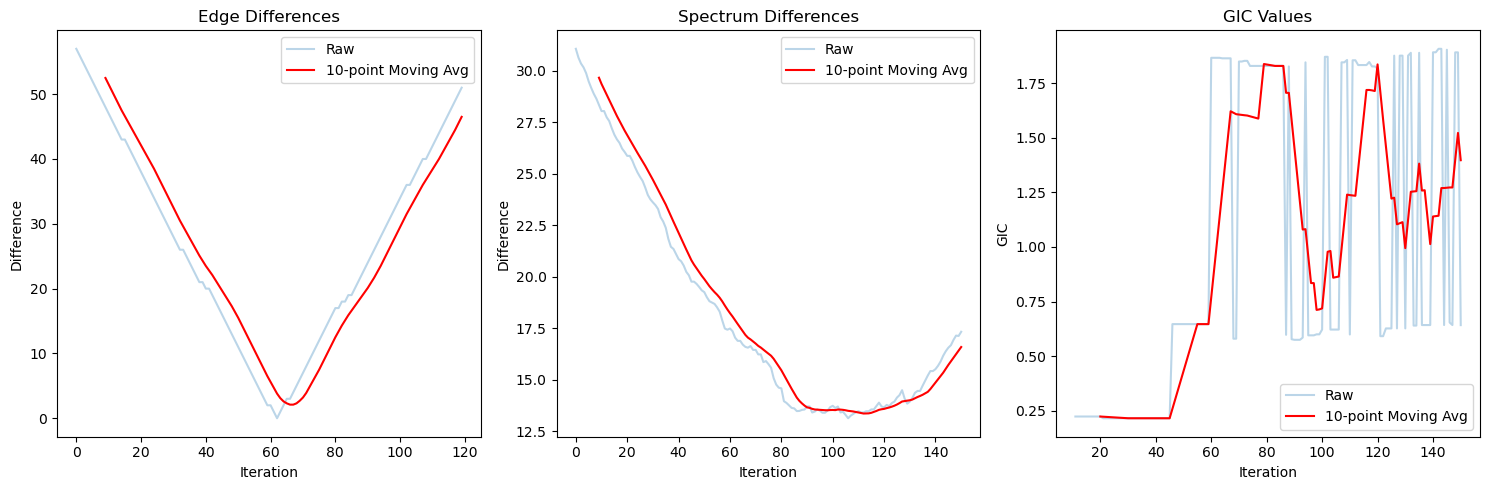

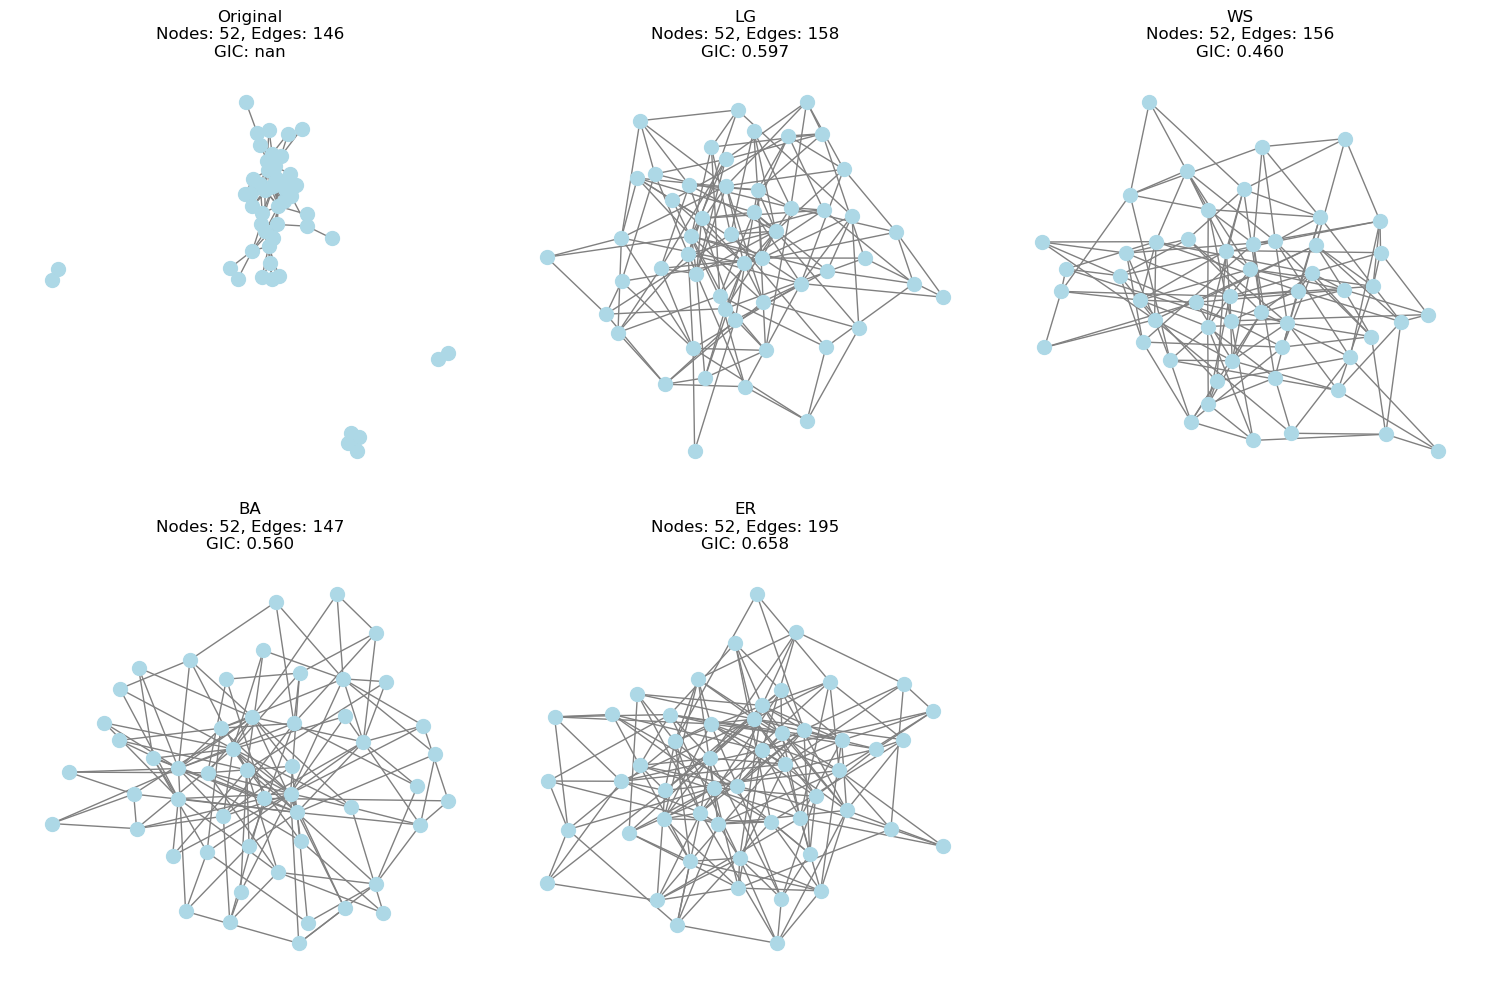

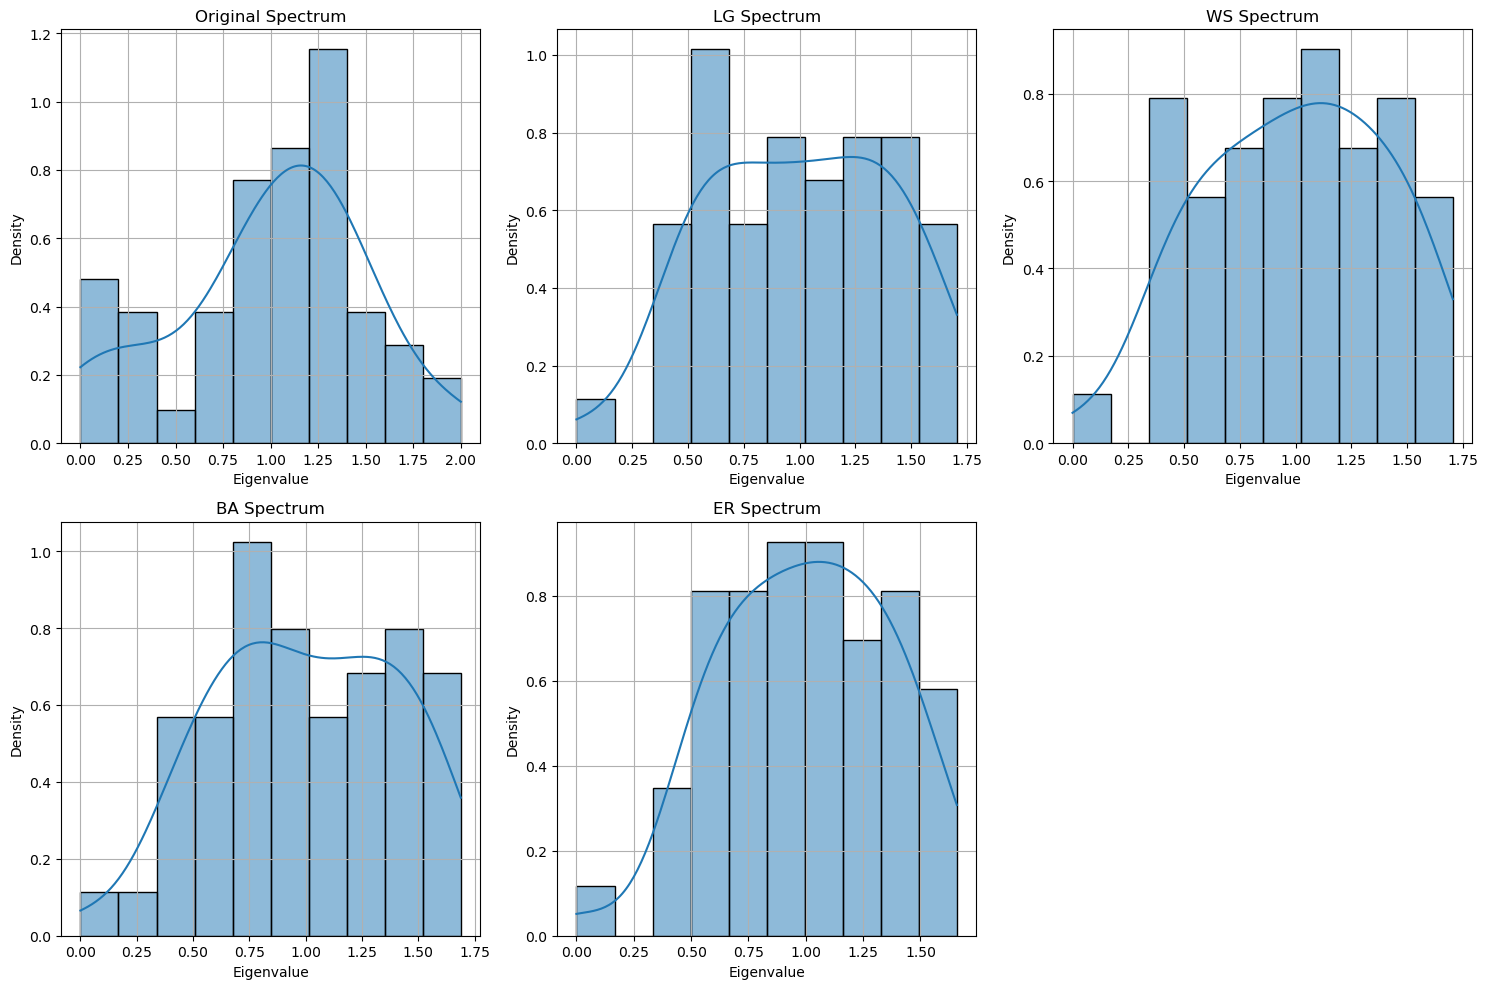

facebook_1


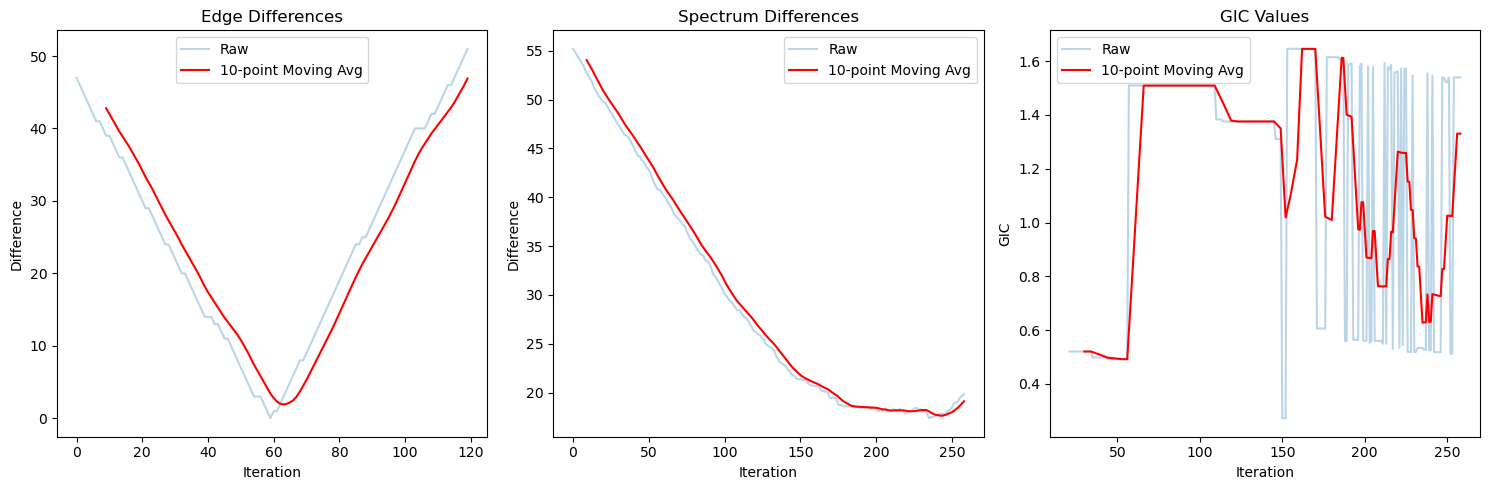

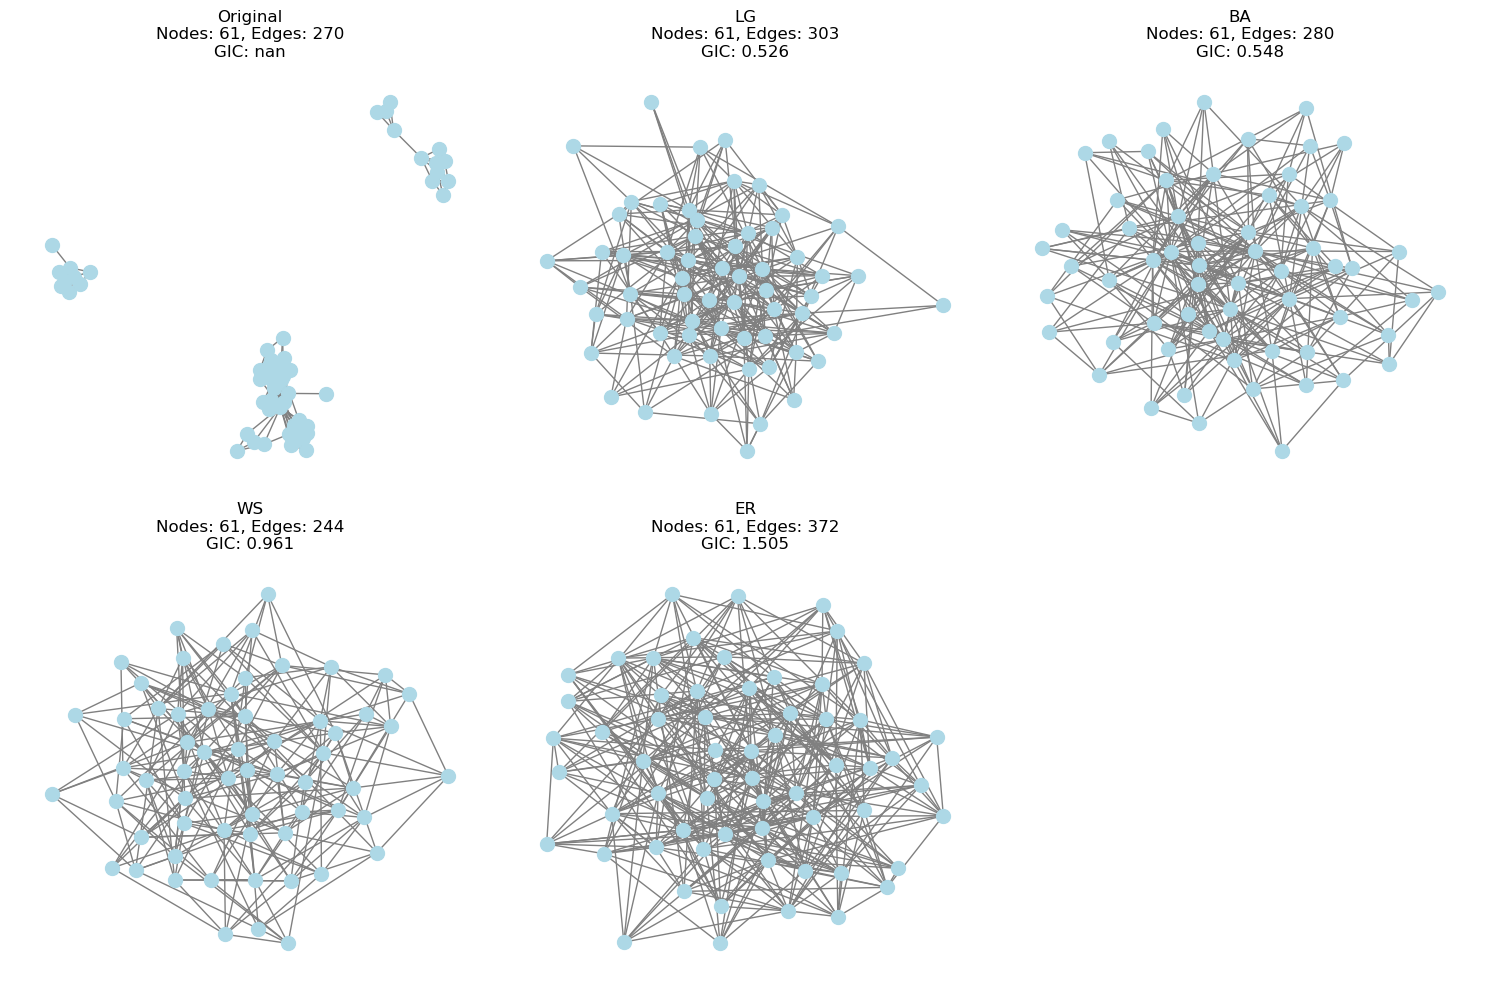

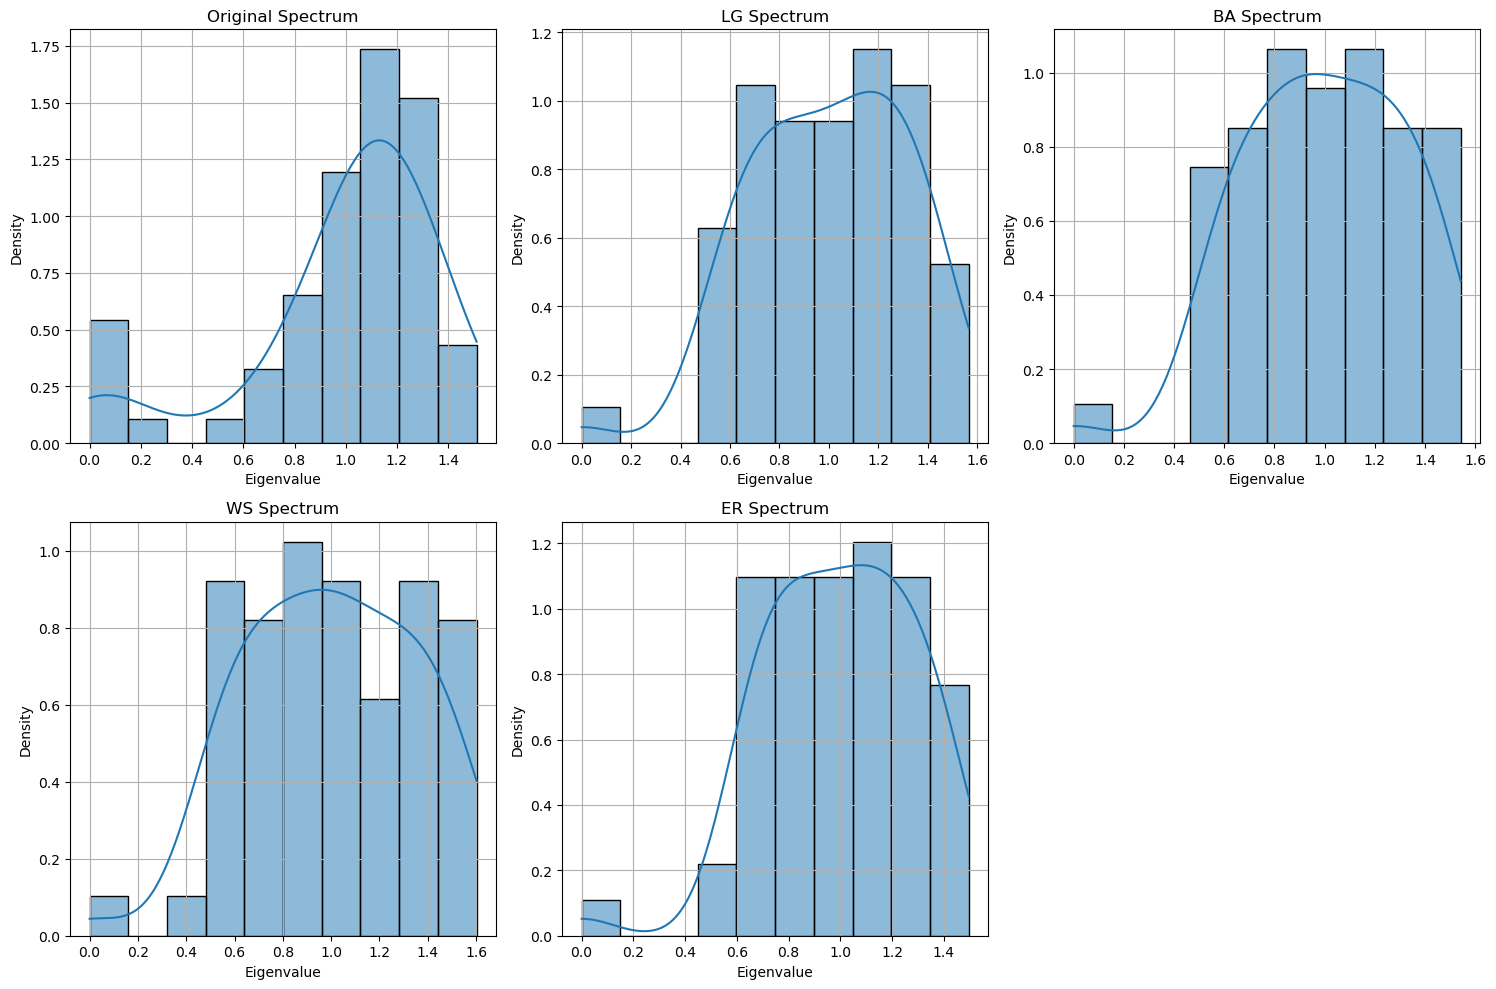

facebook_2


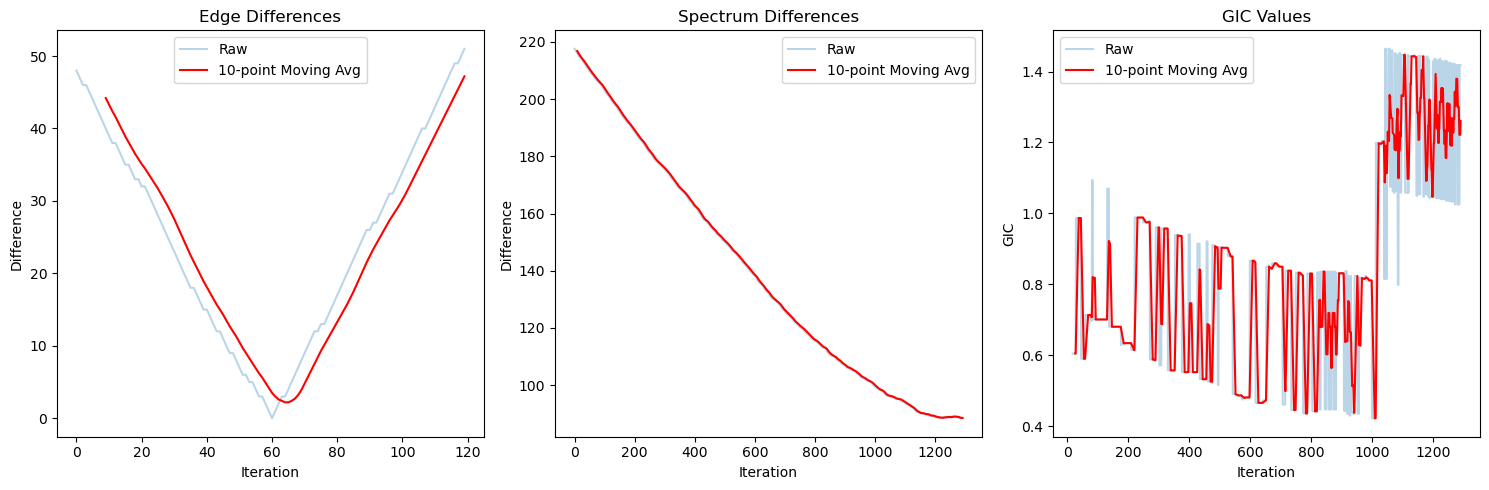

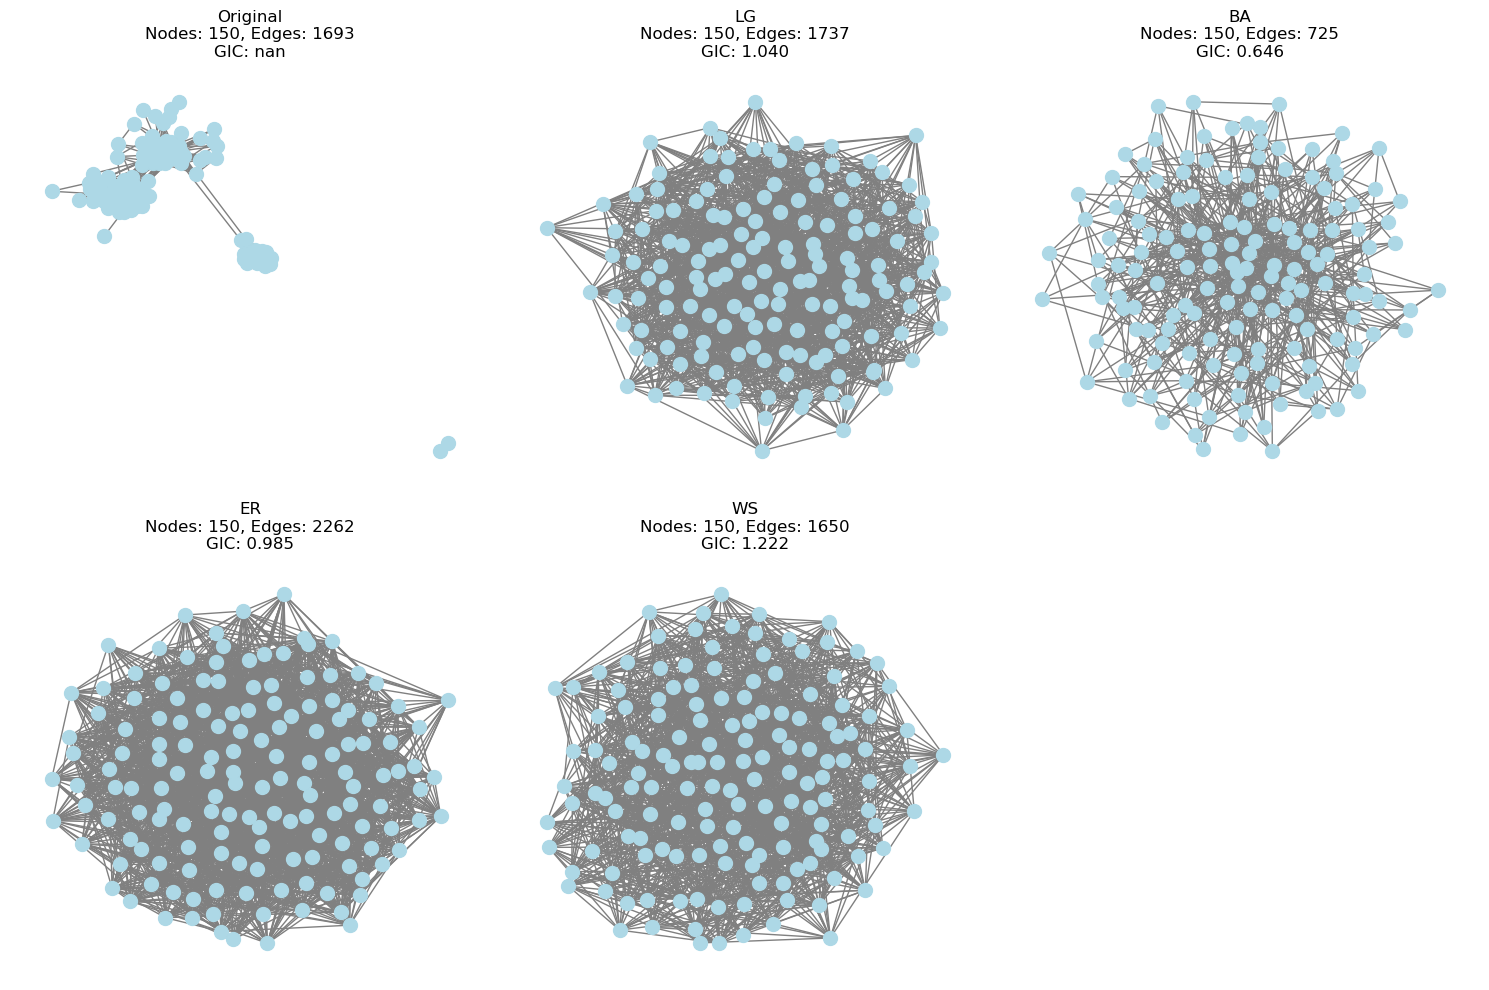

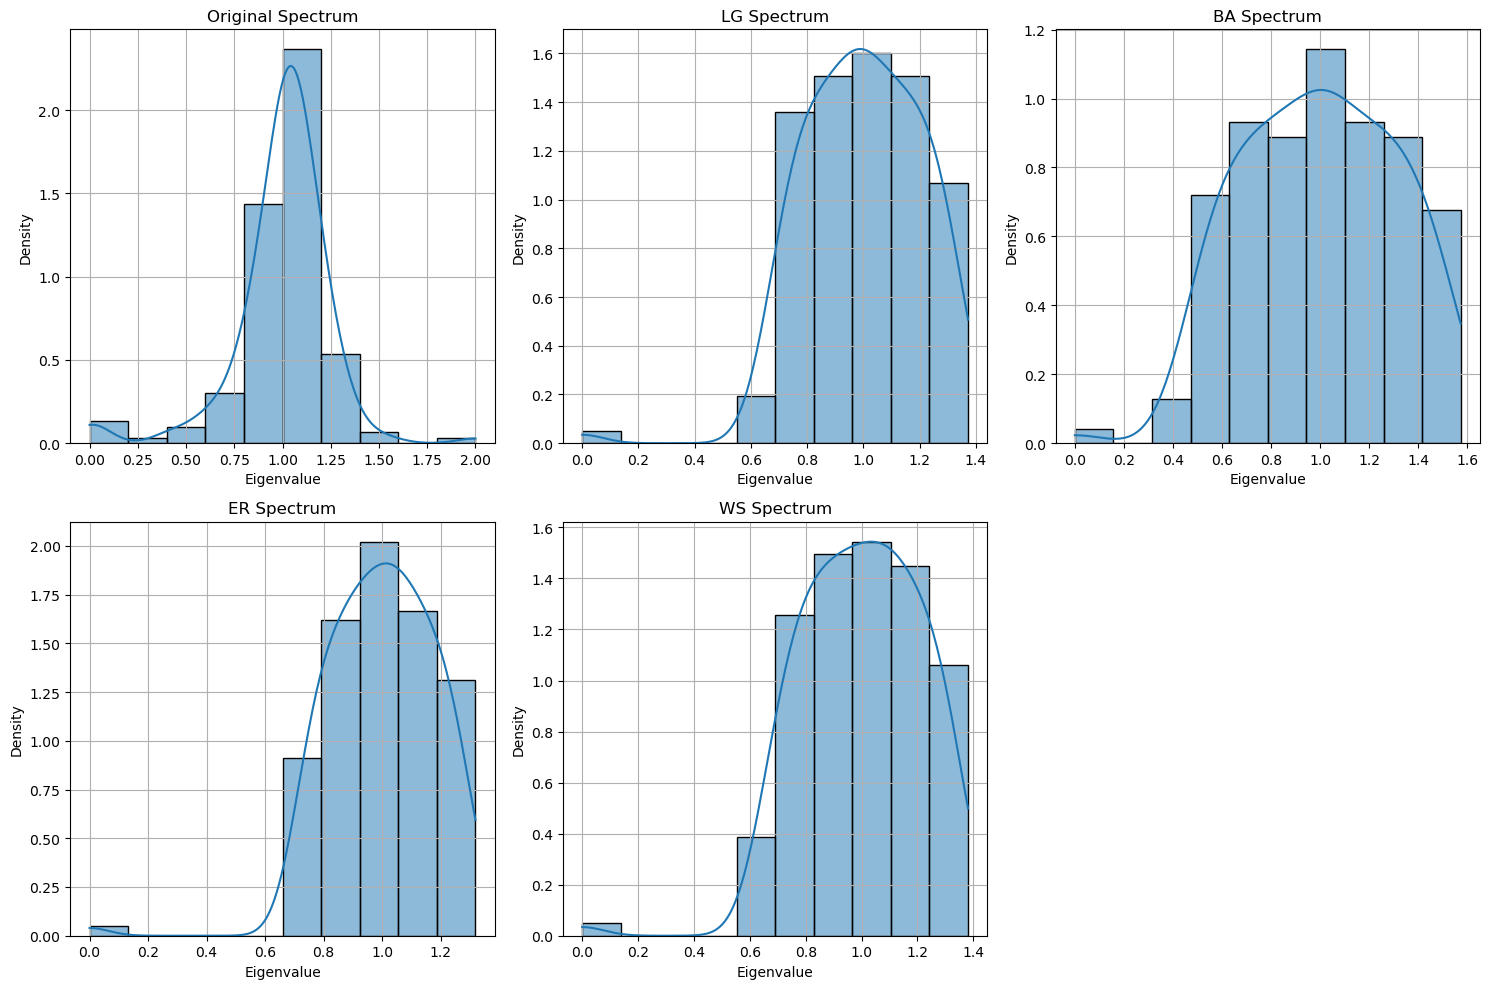

facebook_3


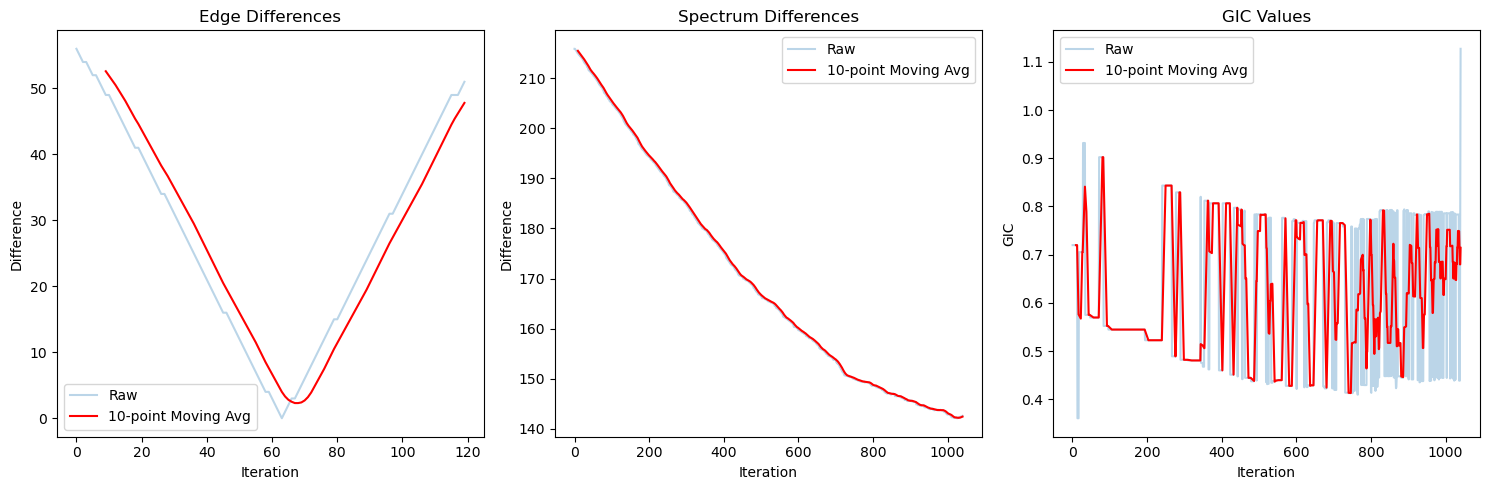

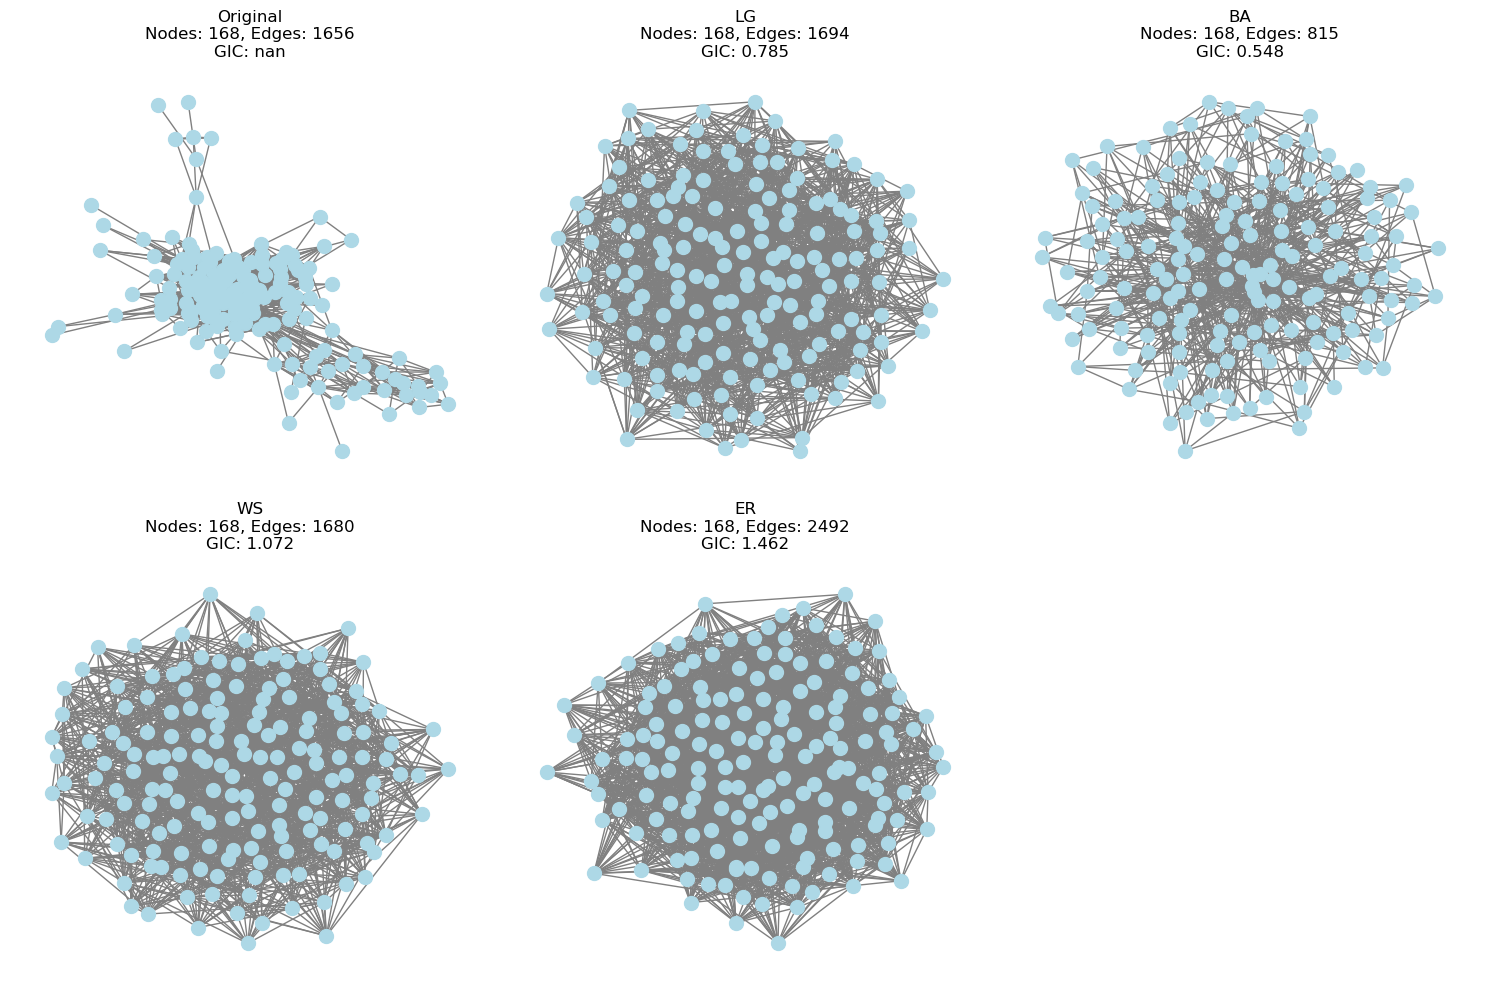

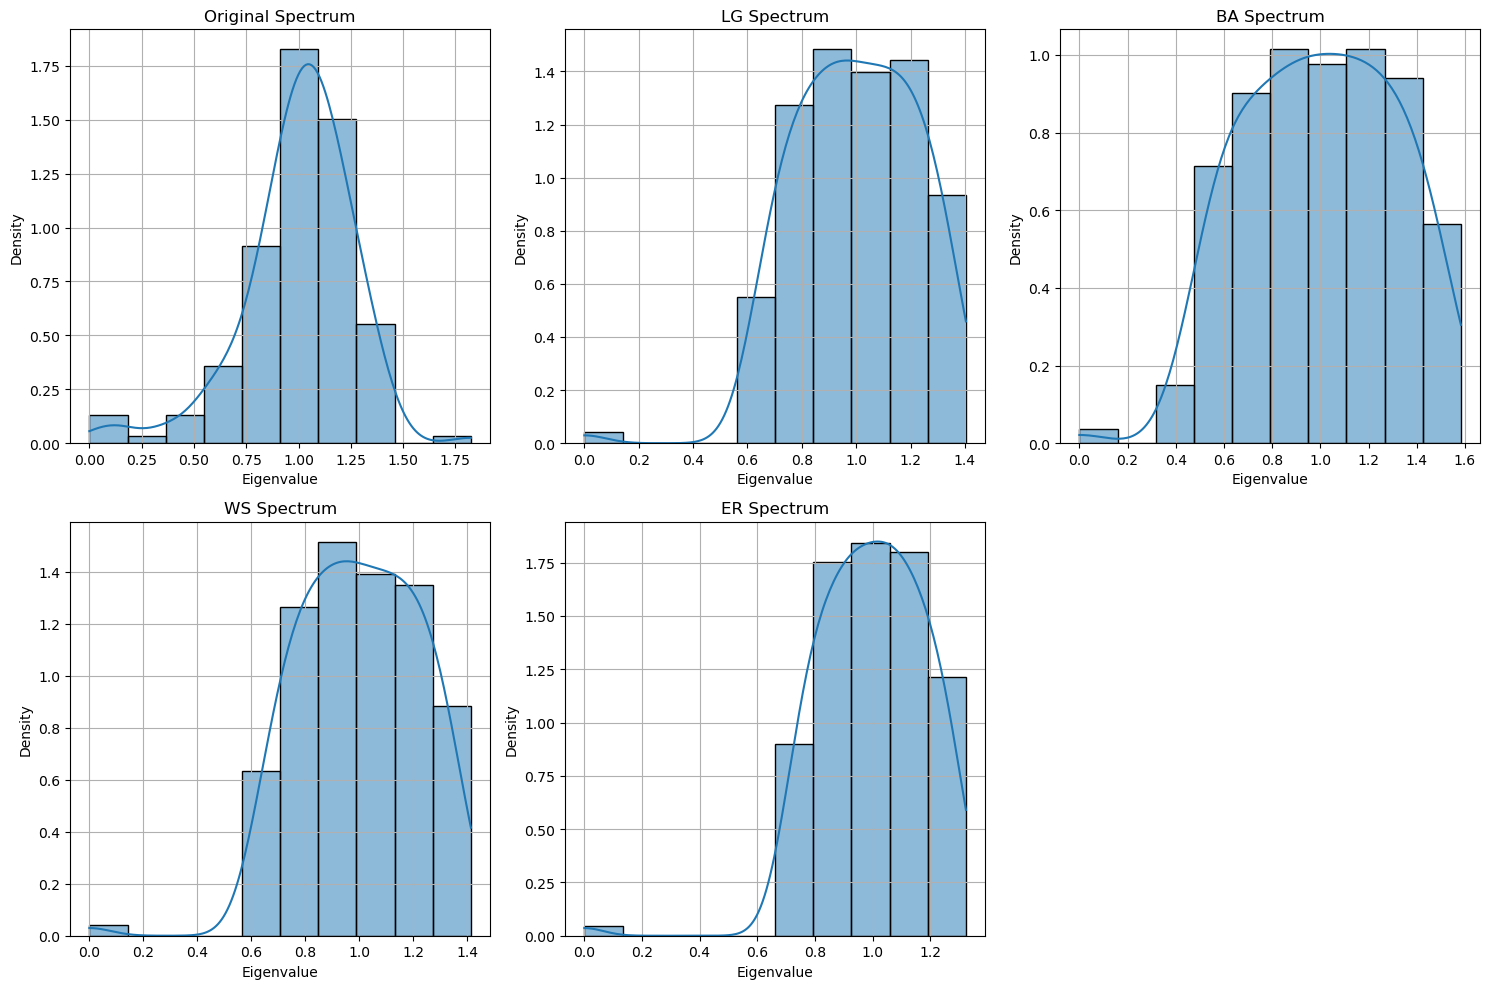

facebook_4


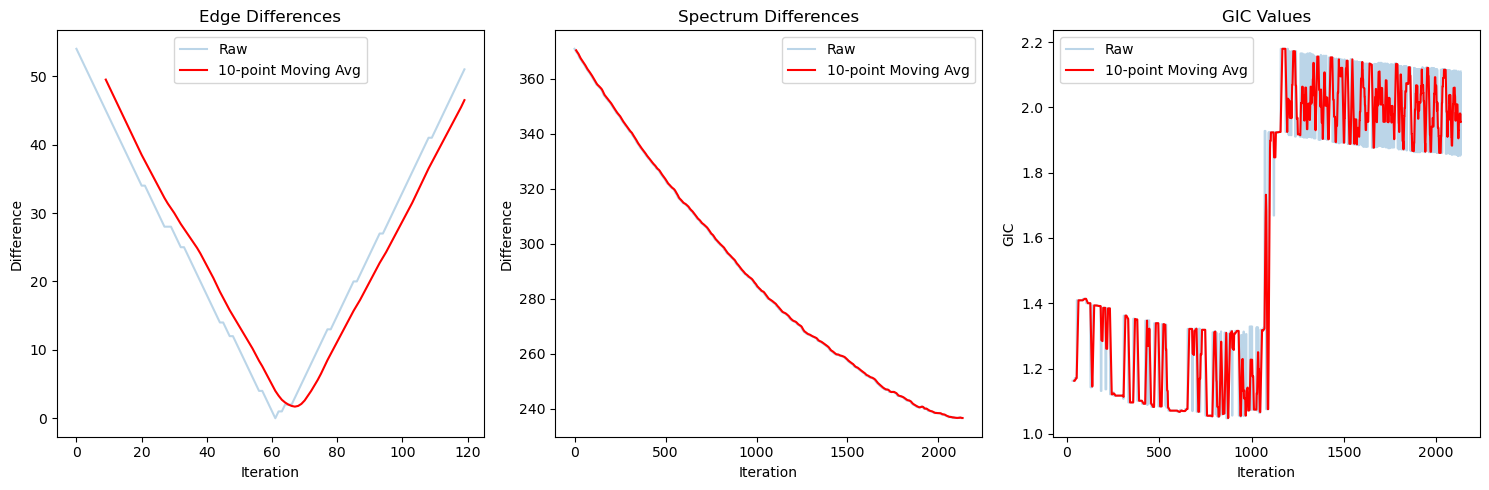

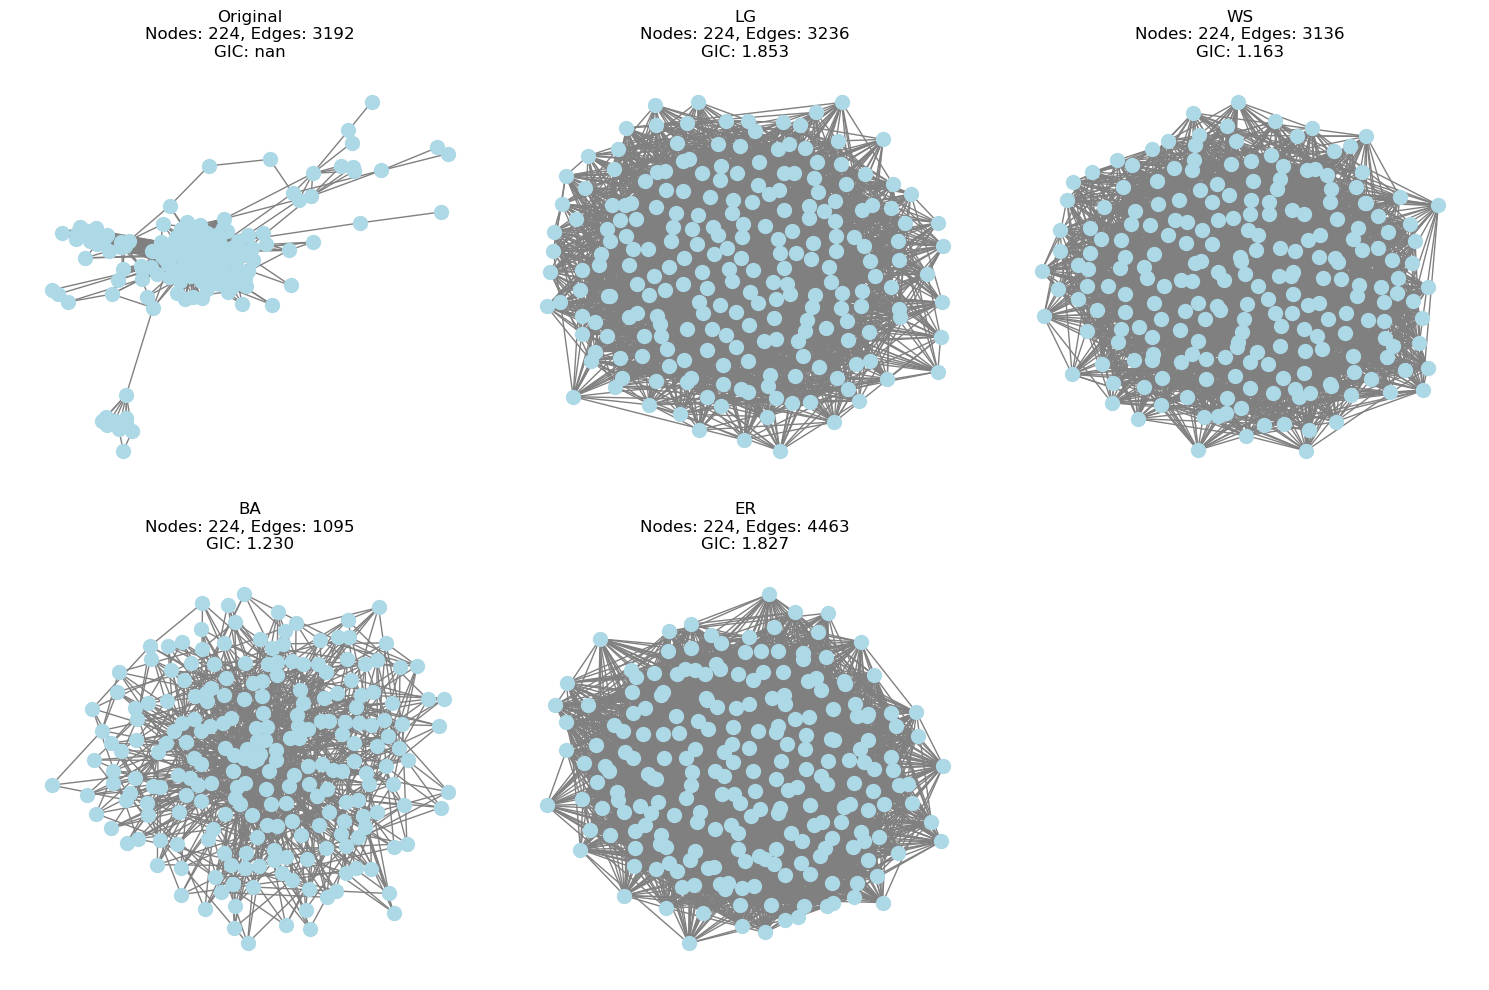

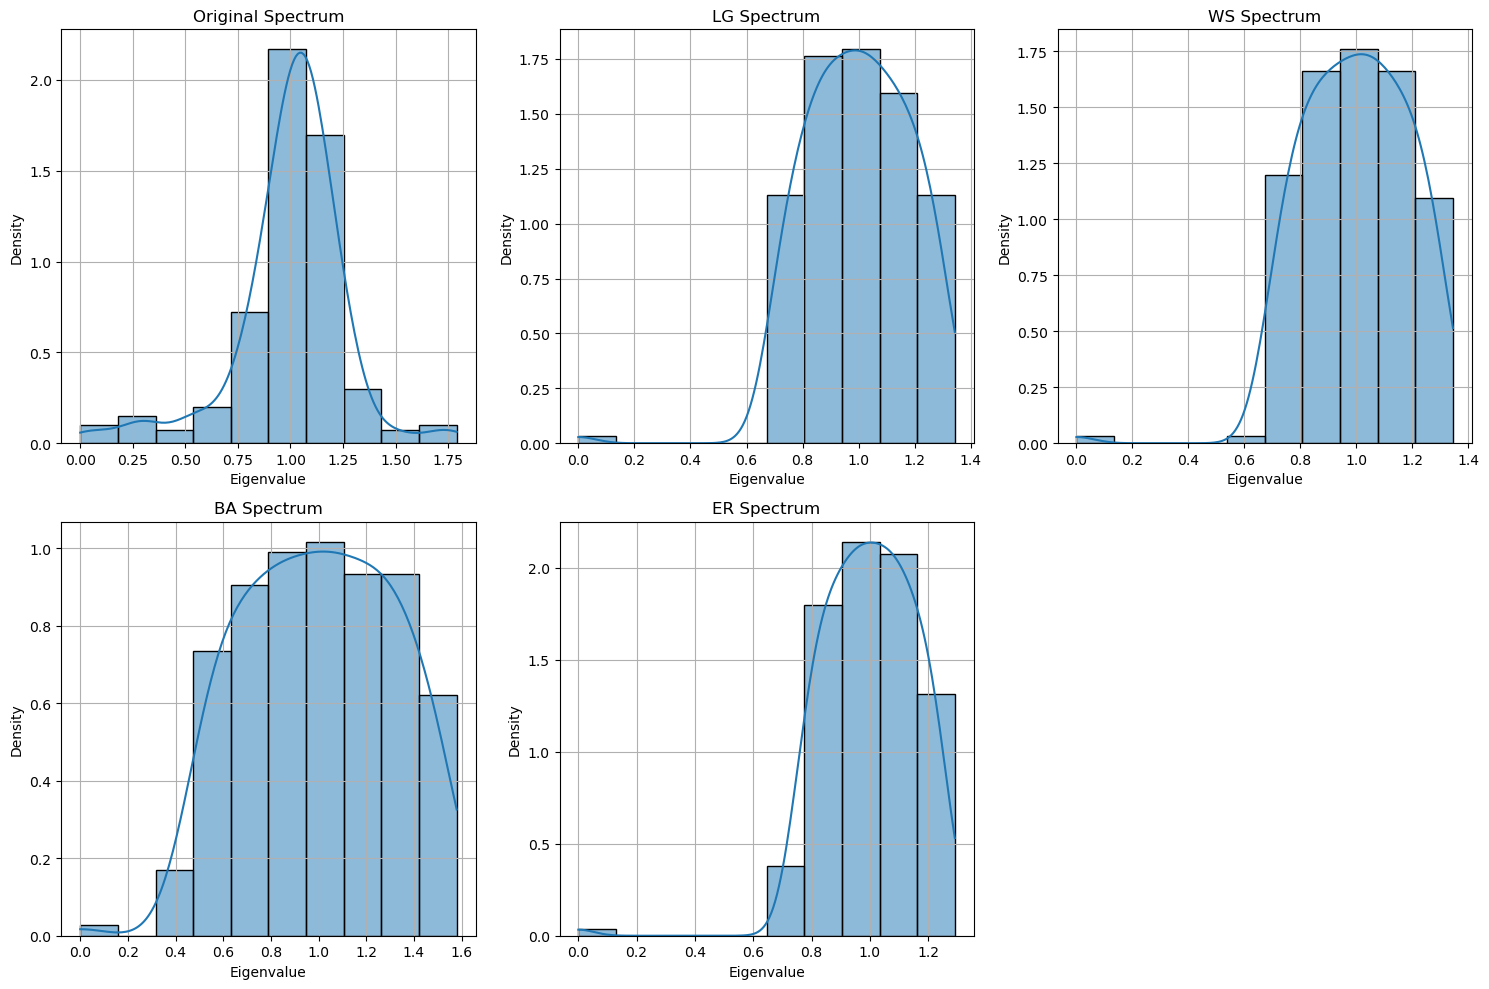

In [13]:
# Gen all plots
os.makedirs(f'imgs', exist_ok=True)
for i in range(len(comparators)):
    if i == 5:
        break
    graph = comparators[i]
    graph_name = f'facebook_{i}'
    print(graph_name)

    #graph = find_comparator_for_connectome('rhesus_cerebral.cortex_1.graphml')
    os.makedirs(f'imgs', exist_ok=True)
    spec_diff = graph.fitted_graphs_data['LG']['metadata']['spectrum_diffs']
    edge_diff = graph.fitted_graphs_data['LG']['metadata']['edge_diffs']
    gic_values = graph.fitted_graphs_data['LG']['metadata']['gic_values']

    # Calculate moving averages with window size of 10
    window = 10
    edge_diff_ma = pd.Series(edge_diff).rolling(window=window).mean()
    spec_diff_ma = pd.Series(spec_diff).rolling(window=window).mean()
    gic_values_ma = pd.Series(gic_values).rolling(window=window).mean()

    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.plot(edge_diff, alpha=0.3, label='Raw')
    plt.plot(edge_diff_ma, 'r-', label=f'{window}-point Moving Avg')
    plt.title('Edge Differences')
    plt.xlabel('Iteration')
    plt.ylabel('Difference')
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(spec_diff, alpha=0.3, label='Raw')
    plt.plot(spec_diff_ma, 'r-', label=f'{window}-point Moving Avg')
    plt.title('Spectrum Differences')
    plt.xlabel('Iteration')
    plt.ylabel('Difference')
    plt.legend()

    plt.subplot(1,3,3)
    plt.plot(gic_values, alpha=0.3, label='Raw')
    plt.plot(gic_values_ma, 'r-', label=f'{window}-point Moving Avg')
    plt.title('GIC Values')
    plt.xlabel('Iteration')
    plt.ylabel('GIC')
    plt.legend()

    plt.tight_layout()

    # Save the figure
    plt.savefig(f'imgs/{graph_name}_iteration.png', bbox_inches='tight', dpi=300)

    plt.show()
    # Get the graph data for each model
    graph_data = graph.fitted_graphs_data

    # Create a figure with subplots for each model
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    # Plot each graph
    for i, (model, data) in enumerate(graph_data.items()):
        graph2 = data['graph']
        pos = nx.spring_layout(graph2, seed=42)
        
        nx.draw(graph2, pos, ax=axes[i], 
                node_size=100,
                node_color='lightblue',
                edge_color='gray',
                with_labels=False)
        
        # Add title with model name and key metrics
        attrs = data['attributes']
        gic = data['metadata'].get('gic_value', 'N/A')
        title = f"{model}\n"
        title += f"Nodes: {attrs['nodes']}, Edges: {attrs['edges']}\n"
        # title += f"Density: {attrs['density']:.2f}\n"
        # title += f"Avg Clustering: {attrs['avg_clustering']:.2f}\n"
        title += f"GIC: {gic:.3f}" if isinstance(gic, float) else f"GIC: {gic}"
        axes[i].set_title(title)

    # Remove extra subplot
    axes[-1].remove()

    plt.tight_layout()

    # Save the figure
    plt.savefig(f'imgs/{graph_name}_graph.png', bbox_inches='tight', dpi=300)

    plt.show()
    # Get the graph data for each model
    graph_data = graph.fitted_graphs_data

    # Create a figure with subplots for each model
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    # Plot spectrum for each graph
    for i, (model, data) in enumerate(graph_data.items()):
        graph = data['graph']
        
        try:
            # Calculate eigenvalues
            L = nx.normalized_laplacian_matrix(graph)
            eigenvalues = np.linalg.eigvals(L.toarray())
            eigenvalues = np.real(eigenvalues)  # Get real parts
            
            # Plot histogram and KDE with reduced number of bins
            sns.histplot(data=eigenvalues, kde=True, ax=axes[i], stat='density', bins=10)
            axes[i].set_title(f"{model} Spectrum")
            axes[i].set_xlabel("Eigenvalue")
            axes[i].set_ylabel("Density")
            axes[i].grid(True)
        except MemoryError:
            axes[i].text(0.5, 0.5, "Memory Error", ha='center', va='center')
            axes[i].set_title(f"{model} Spectrum (Failed)")

    # Remove extra subplot
    axes[-1].remove()

    plt.tight_layout()

    # Save the figure
    plt.savefig(f'imgs/{graph_name}_spectrum.png', bbox_inches='tight', dpi=300)

    plt.show()

